# PDAP-2018: Session 12 (22 June 2018)

## Links

### Matplotlib
- [Matplotlib Gallery](https://matplotlib.org/2.2.2/gallery/index.html)
- [Matplotlib style sheet reference](https://matplotlib.org/2.2.2/gallery/style_sheets/style_sheets_reference.htm)
- [Matplotlib axes (! not Figure!) reference](https://matplotlib.org/2.2.2/_images/sphx_glr_anatomy_001.png)

### Pandas
- [Pandas plotting with Matplotlib](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

### Cartopy
- [Cartopy and Matplotlib](https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html)
- [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)

## Transcript

Now following is the original transcript as used in class on 08 June 2018.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

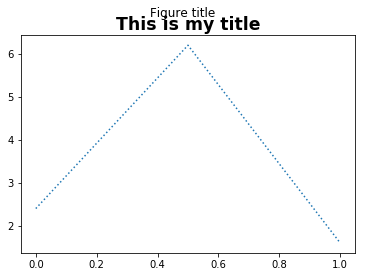

In [2]:
x = np.array([0.0, 0.5, 1.0])
y = np.array([2.4, 6.2, 1.6])
plt.plot(x, y, ':');
plt.title('This is my title', size='xx-large', weight='bold')
fig = plt.gcf()
ax = plt.gca()
fig.suptitle('Figure title');
fig.savefig('myplot.png', )

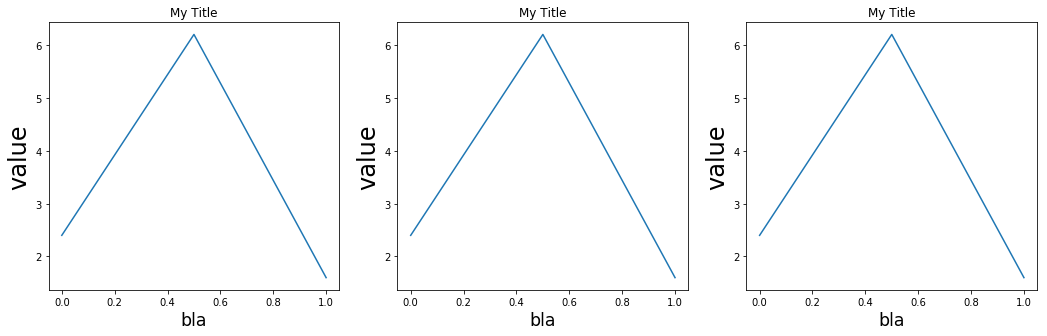

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(45 / 2.54, 12.5 / 2.54))
for ax in axs.ravel():
    ax.plot(x, y)
    ax.set_title('My Title');
    ax.set_ylabel('value', size=24);
    ax.set_xlabel('bla', size='xx-large')

In [4]:
import matplotlib as mpl

def make_plot_pretty(ax):
    ax.set_title('My Title');
    ax.set_ylabel('value', size=24);
    ax.set_xlabel('bla', size='xx-large')
    ax.tick_params(which='major', width=1.0, labelsize=14)
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(4))

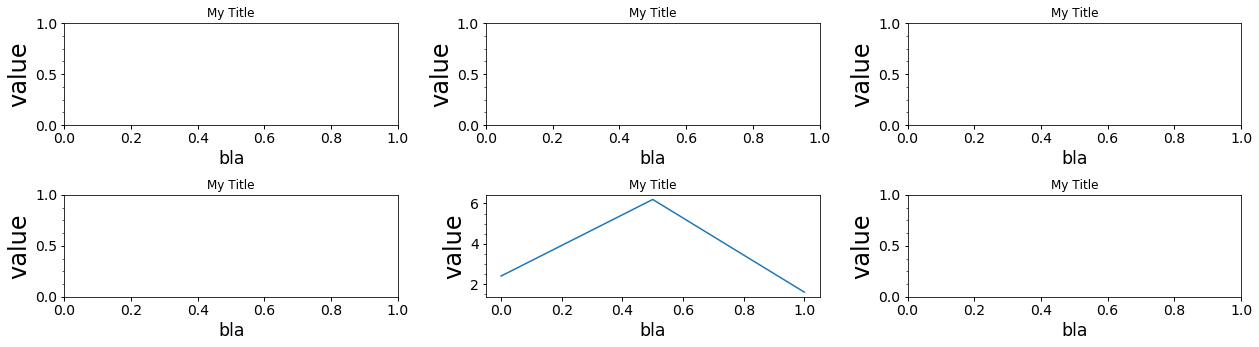

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(45 / 2.54, 12.5 / 2.54))
axs[1, 1].plot(x, y)
for ax in axs.ravel():
    make_plot_pretty(ax)
fig.tight_layout()

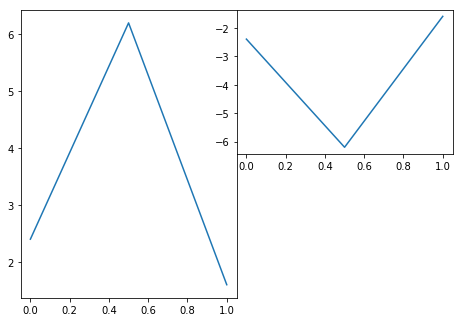

In [6]:
# plt.axes([left, bottom, width, height])
ax1 = plt.axes([0.0, 0., .5, 1.])
ax1.plot(x, y)
ax2 = plt.axes([0.5, 0.5, .5, .5])
ax2.plot(x, -y)

In [7]:
def prepare_figure():
    ax1 = plt.axes([0., 0., 0.5, 1])
    ax2 = plt.axes([.5, .5, .5, .5])
    return ax1, ax2

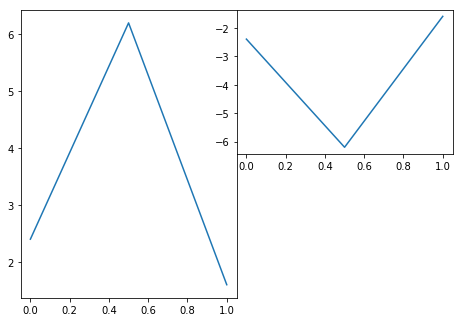

In [8]:
ax1, ax2 = prepare_figure()
ax1.plot(x, y)
ax2.plot(x, -y)

### Using color depending on data

In [9]:
lons = np.random.random(20) * 30
lats = np.random.random(20) * 30
measurements = np.random.random(20)

5

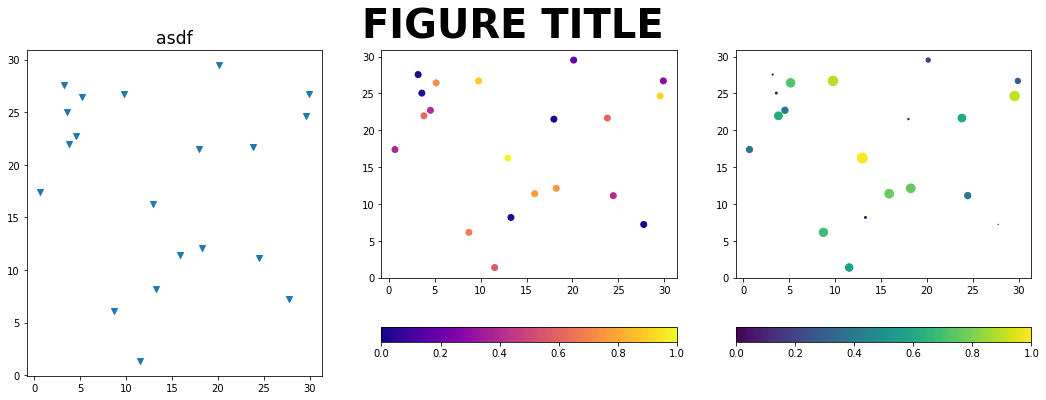

In [10]:
fig = plt.figure(figsize=(18, 6))
fig.suptitle("FIGURE TITLE", size=40, weight='bold')
ax1 = plt.subplot(1, 3, 1)
ax1.set_title('asdf', size='xx-large')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.scatter(lons, lats, marker='v')
m2 = ax2.scatter(lons, lats, c=measurements, vmin=0, vmax=1, cmap='plasma')
m3 = ax3.scatter(lons, lats, s=measurements * 100, c=measurements, vmin=0, vmax=1)
fig.colorbar(m2, ax=ax2, orientation='horizontal', )
fig.colorbar(m3, ax=ax3, orientation='horizontal', )
len(fig.axes)

### Style sheets

see https://matplotlib.org/2.2.2/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py

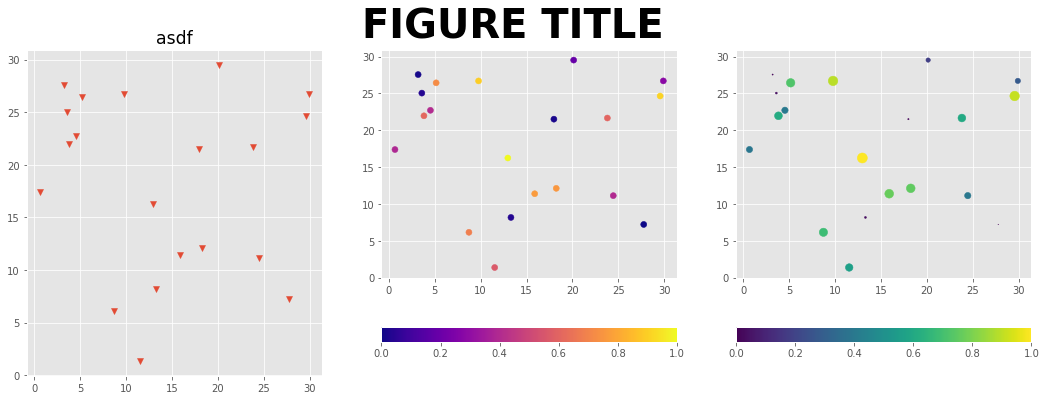

In [11]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(18, 6))
    fig.suptitle("FIGURE TITLE", size=40, weight='bold')
    ax1 = plt.subplot(1, 3, 1)
    ax1.set_title('asdf', size='xx-large')
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    ax1.scatter(lons, lats, marker='v')
    m2 = ax2.scatter(lons, lats, c=measurements, vmin=0, vmax=1, cmap='plasma')
    m3 = ax3.scatter(lons, lats, s=measurements * 100, c=measurements, vmin=0, vmax=1)
    fig.colorbar(m2, ax=ax2, orientation='horizontal', )
    fig.colorbar(m3, ax=ax3, orientation='horizontal', )

In [12]:
plt.style.use('ggplot')

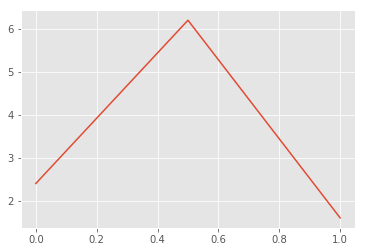

In [13]:
plt.plot(x, y)

### Plotting maps

In [14]:
import cartopy.crs as ccrs

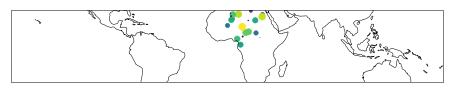

In [15]:
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
ax.coastlines()
# ax.stock_img()
ax.scatter(lons, lats, s=measurements * 50, c=measurements)
ax.set_extent((-180., 180., -30., 30.))

In [25]:
img = plt.imread('../data/modis-image.tif') #[::-1] no need to manually revert y-order, rather use `origin=` in the `imshow` call, see below
type(img), img.shape, img.dtype

(numpy.ndarray, (400, 400, 3), dtype('uint8'))

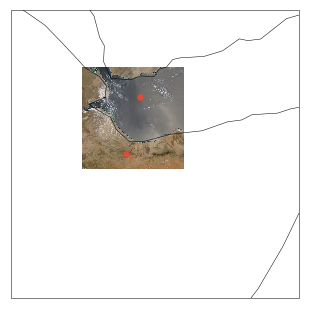

In [26]:
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
ax.coastlines(zorder=1)
ax.imshow(img, extent=(42.4701578, 45.9857828, 9.4824214, 12.9980464), origin='upper')  # use `origin=` to automatically flip the image
ax.scatter(lons, lats, s=measurements * 50, c=measurements)
ax.set_extent((40, 50., 5, 15))
ax.scatter([44., 44.5], [10., 12],
          zorder=999)

In [18]:
# get image coordinates of GeoTiff files using GDAL (http://gdal.org ?)
# you should be able to do 
# conda install gdal
# conda install -c conda-forge gdal
# then you can do
# gdalinfo /path/to/geotiff/file.tif

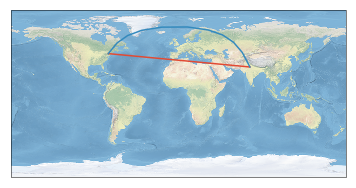

In [19]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat])

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat], transform=ccrs.Geodetic())

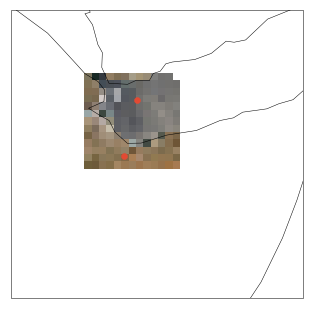

In [28]:
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.LambertConformal(42., 10))
ax.coastlines(zorder=1)
ax.imshow(img, extent=(42.4701578, 45.9857828, 9.4824214, 12.9980464),
         transform=ccrs.PlateCarree(), origin='upper')
ax.set_extent((40, 50., 5, 15))
ax.scatter([44., 44.5], [10., 12],
          zorder=999, transform=ccrs.PlateCarree())

In [ ]:
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=50.0, satellite_height=35785831))
ax.coastlines(zorder=1)
ax.imshow(img, extent=(42.4701578, 45.9857828, 9.4824214, 12.9980464),
         transform=ccrs.PlateCarree(), origin='upper')
ax.set_extent((40, 50., 5, 15))
ax.scatter([44., 44.5], [10., 12],
          zorder=999, transform=ccrs.PlateCarree())

### Reusing code / writing your own modules

Imagine you have a file `my_module.py` in the same directory as your notebook, which has some Python code in it:

In [13]:
!cat my_module.py

def my_function():
    return "asdf"


You can then import anything from that `.py` file and use it in your notebook:

In [14]:
from my_module import my_function

In [15]:
my_function()

'asdf'